In [1]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import pos_tag, pos_tag_sents
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import PunktSentenceTokenizer
import re
from collections import Counter
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [2]:
data = pd.read_csv('./the-office-lines - scripts.csv')

---

# Part 1: Cleaning and Preparation

In [3]:
# replaces unsightly characters
data['line_text'] = data['line_text'].apply(lambda x: str(x).replace('���', "'"))

#make all text lowercase so we can remove common words
data['line_text'] = data['line_text'].str.lower()

In [4]:
# only keep lines that actually aired
data = data[data['deleted']==False]

In [5]:
# this section extracts the situation out of the line_text 
data['line_text_situation'] = [i.split("[")[1].split("]")[0] if len(i.split("[")) >1 else "none" for i in data['line_text']]
data['line_text'] = data['line_text'].str.replace(r"\[.*\]","")

In [6]:
# variable for stop words
stop_words = set(stopwords.words('english'))

# variable for getting word stems
ps = PorterStemmer()

In [7]:
# separates sentences
data['sentence_breakdown'] = data['line_text'].apply(sent_tokenize)

# separates words
data['word_breakdown'] = data['line_text'].apply(word_tokenize)

# removes common words
data['filtered_sentence'] = data['line_text'].apply(lambda x: [i for i in str.split(x) if i not in stop_words])

# returns the 'base' of each word - essentially removes tenses 
data['stemmed_words'] = data['filtered_sentence'].apply(lambda x : [ps.stem(y) for y in x])

In [8]:
#remove unsightly brackets created from the parsing above
cols = ['sentence_breakdown', 'word_breakdown', 'filtered_sentence', 'stemmed_words']

for i in cols:
    data[i] = data[i].apply(lambda x: str(x).replace('[',''))
    data[i] = data[i].apply(lambda x: str(x).replace(']',''))

In [9]:
# create a column that counts sentences spoken
data['sentence_count'] = data['sentence_breakdown'].str.split(',').str.len()

# create columns that count overall words, filtered words, and fluff words
data['overall_word_count'] = data['word_breakdown'].str.split(',').str.len()
data['filtered_word_count'] = data['filtered_sentence'].str.split(',').str.len()
data['fluff_word_count'] = data['overall_word_count'] - data['filtered_word_count']

# words per sentence
data['words_per_sentence'] = data['overall_word_count'] / data['sentence_count']

In [10]:
# top 100 most popular words 

pop_word_list = Counter(" ".join(data["filtered_sentence"]).split()).most_common(100)
popular_words = pd.DataFrame(pop_word_list, columns=['word', 'count'])
popular_words['word'] = popular_words['word'].str[1:-2] # there is a blank space at the end of each word
popular_words['word'] = popular_words['word'].apply(lambda x: str(x).replace(',',''))
popular_words['word'] = popular_words['word'].apply(lambda x: str(x).replace('.',''))

In [11]:
# calculate polarity and subjectivity
# this model was trained on the NaiveBayesClassifier which used Movie Review data 

# The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float\
# within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
data[['polarity', 'subjectivity']] = data['line_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [12]:
# create a joined episode and season column, it will look better in charts
data['season+episode'] = data['season'].map(str) + "." + data['episode'].map(str)

In [13]:
scores = ['polarity', 'subjectivity', 'season+episode']

for i in scores:
    data[i] = data[i].astype(float)

In [14]:
#clean up speaker names 
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('M ichael', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Michae', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Michal', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Michaell', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Michaelll', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Mihael', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Miichael', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Micael', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Micahel', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Micheal', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('MIchael', 'Michael'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Stanely', 'Stanley'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('JIM9334 [screen name]', 'Jim'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('JIM9334', 'Jim'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('JIm', 'Jim'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Phili', 'Phyllis'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Phyliss', 'Phyllis'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('sAndy', 'Andy'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Eri', 'Erin'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Erinc', 'Erin'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Erinn', 'Erin'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('DwightKSchrut', 'Dwight'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Dight', 'Dwight'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('Angels', 'Angela'))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('.', ''))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace(':', ''))
data['speaker'] = data['speaker'].apply(lambda x: str(x).replace('[on phone]', ''))
data['speaker'] = data['speaker'].map(lambda x: x.strip())

In [15]:
#create column to differentiate between main and other characters
main_characters = ['Michael', 'Jim', 'Dwight', 'Pam', 'Stanley', 'Phyllis', 'Angela', 'Oscar', 'Kevin', 'Creed',\
                  'Meredith', 'Andy', 'Toby', 'Kelly', 'Ryan', 'Erin']

data['character_class'] = ['Main' if i in main_characters else 'Other' for i in data['speaker']]

---

# Part 2: The Analysis

### My first finding was that there was a positive correlation between the subjectivity and polarity of lines in The Office.

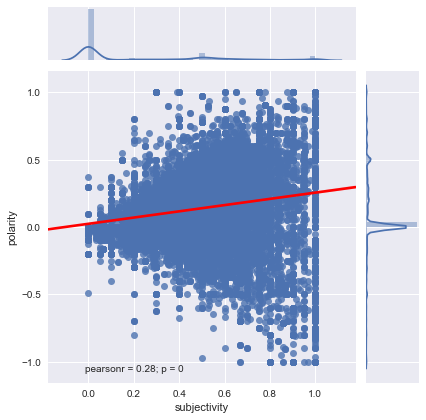

In [16]:
sns.jointplot(data=data, x='subjectivity', y='polarity', kind='reg',\
                  joint_kws={'line_kws':{'color':'red'}})
plt.show()

### Towards the middle of the series, the main characters became slightly more negative, while the other characters became more positive. 
### It is clear that after Michael left in season 7 all characters begin speaking more negatively.
### Overall, the main characters were more subjective in the way they spoke, while the other characters were more objective. If you speak subjectively, you are speaking with your feelings, while if you are speaking objectively, you are stating facts. The writers were clearly using the main characters to invoke emotion in the viewers while they used the other characters to push the storyline along.

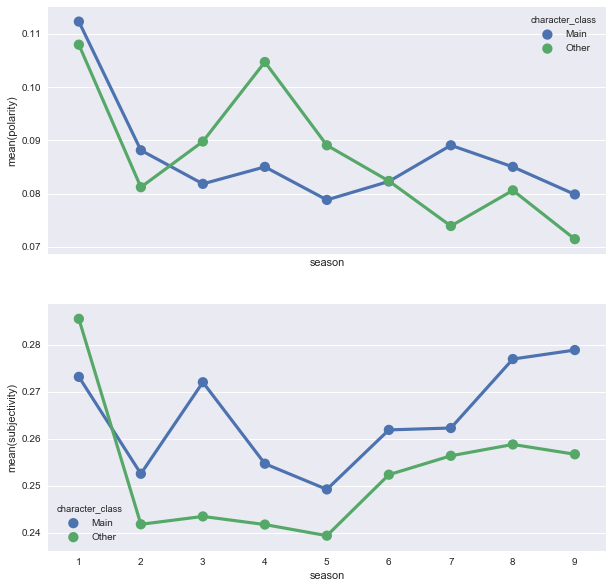

In [17]:
f, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
a = sns.pointplot(x="season", y="polarity", data=data, ci=False, hue='character_class', ax=ax[0])
b = sns.pointplot(x="season", y="subjectivity", data=data, ci=False, hue='character_class', ax=ax[1])
plt.show()

### Chart 1: There is no surprise that Michael spoke the most words over the course of the series, despite him not being there for the final two seasons. 
### Chart 2: I found it funny that, on average, Stanley spoke the most words per sentence, while Kevin spoke the least. I think this is due to Stanley's rants and Kevin's limited vocabulary.
### Chart 3: We can see that Michael's lines ranged widely in regards to their polarity. This really shows how emotional of a character he was. Stanley, Angela and Kevin primarily had neutral statements. I have removed outliers from the plot for ease of visualization. It also appears as though roughly a quarter of all characters lines were neutral.

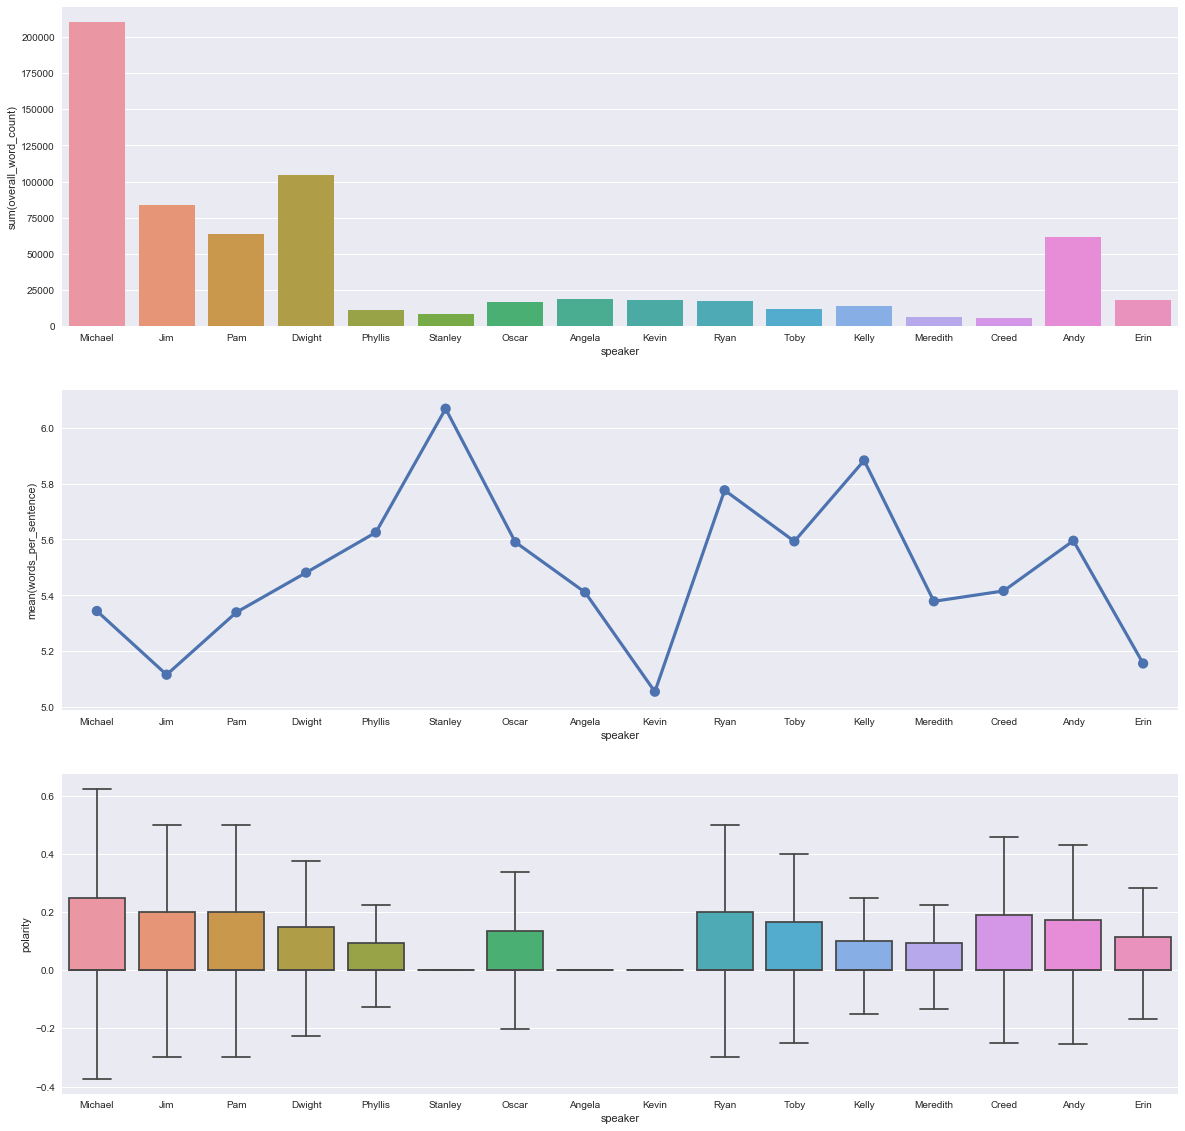

In [40]:
f, ax = plt.subplots(3,1, figsize=(20,20))

sns.pointplot(x="speaker", y="words_per_sentence", data=data[data['character_class']=='Main'],\
              ci=False, ax=ax[1])
sns.barplot(data=data[data['character_class']=='Main'], x='speaker',\
           y='overall_word_count', estimator=sum, ci=False, ax=ax[0])
sns.boxplot(data=data[data['character_class']=="Main"], x='speaker', y='polarity', showfliers=False, ax=ax[2])

plt.show()